In [18]:
import librosa
import numpy as np
import pydelia
import matplotlib.pyplot as plt

sine_arr = [0.0,0.0569595,0.11373405,0.17013931,0.22599211,0.28111112,0.33531737,0.38843483,0.44029102,0.49071756,0.5395507,0.586632,0.63180846,0.6749334,0.7158668,0.7544758,0.790635,0.824227,0.8551427,0.88328177,0.9085528,0.93087375,0.9501721,0.96638525,0.97946054,0.98935544,0.9960379,0.9994862,0.99968916,0.9966461,0.9903669,0.980872,0.9681921,0.9523685,0.9334525,0.9115056,0.88659906,0.85881364,0.8282397,0.79497635,0.7591317,0.7208222,0.68017215,0.63731354,0.5923856,0.54553413,0.4969113,0.44667497,0.3949883,0.3420191,0.28793934,0.23292464,0.17715363,0.1208074,0.0640689,0.007122369,-0.04984729,-0.10665509,-0.16311659,-0.21904843,-0.274269,-0.32859907,-0.38186213,-0.43388528,-0.48449957,-0.5335407,-0.5808494,-0.6262721,-0.6696613,-0.710876,-0.7497825,-0.78625435,-0.82017314,-0.8514289,-0.87992007,-0.9055541,-0.92824787,-0.94792753,-0.96452934,-0.97799927,-0.9882937,-0.9953791,-0.99923253,-0.99984145,-0.9972038,-0.99132836,-0.98223406,-0.9699504,-0.9545173,-0.9359849,-0.9144134,-0.8898728,-0.86244273,-0.8322123,-0.79927975,-0.7637519,-0.7257442,-0.6853799,-0.6427903,-0.5981135,-0.5514946,-0.5030851,-0.45304197,-0.40152785,-0.34870997,-0.29475984,-0.2398526,-0.1841666,-0.12788258,-0.07118334,-0.014252959,0.04272352,0.09956165,0.15607649,0.21208456,0.267404,0.32185516,0.37526125,0.42744887,0.47824854,0.5274953,0.5750293,0.6206961,0.6643476,0.7058419,0.7450443,0.78182757,0.81607217]

sine = np.array(sine_arr)
result = librosa.stft(sine, n_fft=64, hop_length=16, window='hann', center=False)

print(result.shape)
print(len(sine))

def numpy_to_zig_complex_format(np_array):
    zig_str = "pub const stft_expected = [_][{1}]ComplexExpect{{\n".format(np_array.shape[0], np_array.shape[1])
    
    for row in np_array:
        zig_str += "    [_]ComplexExpect{\n"
        for val in row:
            zig_str += "        .{{ .re = {0}, .im = {1} }},\n".format(val.real, val.imag)
        zig_str += "    },\n"
    
    zig_str += "};"
    return zig_str

# Generate the Zig-formatted string
# zig_formatted_output = numpy_to_zig_complex_format(result)

# Print the Zig-formatted complex array

(33, 5)
128


In [2]:
import numpy as np

# Define a list of complex numbers using the complex type in Python
data = np.array([1 + 2j, 3 + 4j, 5 + 0j, 6 + 8j, 0 + 9j])

# Length of the array (number of complex numbers)
len_as_float = float(len(data))

# Normalize each complex number by dividing by a complex number (len_as_float + 0j)
length_complex = complex(len_as_float, 0)

# Perform complex division for each element
normalized_data = data / length_complex
print(len_as_float)

# Output the normalized array
normalized_data

5.0


array([0.2+0.4j, 0.6+0.8j, 1. +0.j , 1.2+1.6j, 0. +1.8j])

In [13]:
d = np.array(pydelia.stft(sine_arr, 64, 16))

d.shape, result.shape

((33, 5), (33, 5))

In [16]:
d[:,0]

array([ 2.47642830e+01+0.00000000e+00j, -1.57680964e+01-3.41664608e+00j,
        3.03198010e+00+1.17770971e+00j,  2.67300784e-01+1.62001797e-01j,
        6.26514543e-02+5.53613214e-02j,  1.98459577e-02+2.52892229e-02j,
        7.00765585e-03+1.34133289e-02j,  2.37421102e-03+7.78591459e-03j,
        5.28998708e-04+4.79151902e-03j, -2.31653465e-04+3.06410283e-03j,
       -5.31746758e-04+2.00836207e-03j, -6.26420602e-04+1.33326010e-03j,
       -6.26836096e-04+8.87579837e-04j, -5.85679105e-04+5.85540967e-04j,
       -5.27415244e-04+3.77103015e-04j, -4.64563818e-04+2.31586889e-04j,
       -4.02812234e-04+1.29065117e-04j, -3.45147293e-04+5.69971541e-05j,
       -2.92508394e-04+6.92397323e-06j, -2.45289534e-04-2.76751379e-05j,
       -2.03264212e-04-5.03308345e-05j, -1.66332231e-04-6.43177021e-05j,
       -1.33969826e-04-7.19280524e-05j, -1.05822098e-04-7.42729630e-05j,
       -8.17603797e-05-7.30298070e-05j, -6.09389972e-05-6.88344375e-05j,
       -4.38137381e-05-6.22242883e-05j, -2.93248593

In [17]:
result[:, 0]

array([ 2.48081536e+01+0.00000000e+00j, -1.58274097e+01-3.04802011e+00j,
        2.98666602e+00+9.40809590e-01j,  2.93703573e-01+1.34202493e-01j,
        7.84052939e-02+4.72188073e-02j,  2.99105167e-02+2.23939126e-02j,
        1.39022142e-02+1.24502497e-02j,  7.34370017e-03+7.65513009e-03j,
        4.24635263e-03+5.04860677e-03j,  2.62704057e-03+3.50587322e-03j,
        1.71323187e-03+2.53390293e-03j,  1.16517726e-03+1.88952850e-03j,
        8.20735684e-04+1.44565460e-03j,  5.95006538e-04+1.12934233e-03j,
        4.42397665e-04+8.97663697e-04j,  3.36053249e-04+7.24014773e-04j,
        2.60297658e-04+5.90842213e-04j,  2.05015488e-04+4.87012771e-04j,
        1.64051421e-04+4.04892677e-04j,  1.33159542e-04+3.38439471e-04j,
        1.09661201e-04+2.84397866e-04j,  9.14211078e-05+2.39628152e-04j,
        7.72584869e-05+2.01888946e-04j,  6.61837060e-05+1.70079999e-04j,
        5.72719675e-05+1.42484016e-04j,  5.05513454e-05+1.18424814e-04j,
        4.48999452e-05+9.73007588e-05j,  4.08701589

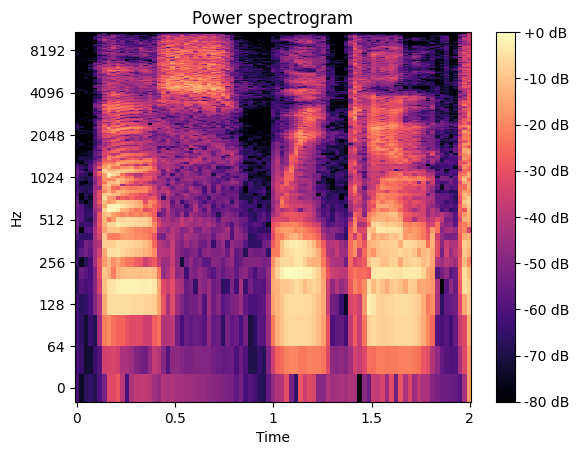

In [27]:
samples, sr = librosa.load('audio_examples/voice.wav')
audio = samples[int(1.0 * sr): (int(2.0 *sr))]

lmatrix = librosa.stft(audio, n_fft=512, hop_length=256)

def plot(matrix):
    mags = np.abs(matrix)
    
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(mags, ref=np.max), y_axis='log', x_axis='time', ax=ax)
    
    ax.set_title('Power spectrogram')
    fig.colorbar(img, ax=ax, format="%+2.0f dB")

plot(lmatrix)

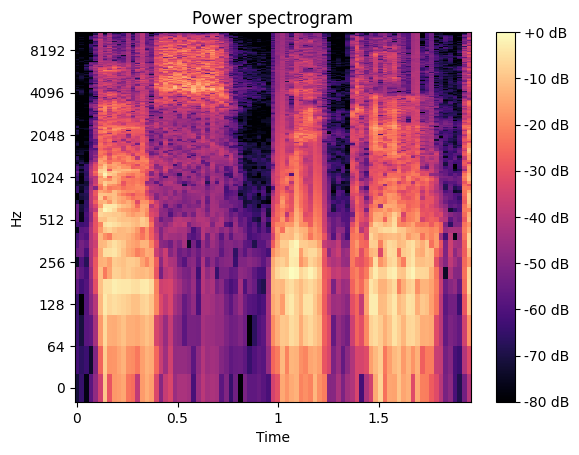

In [29]:
delia_matrix = pydelia.stft(audio.tolist(), 512, 256)

plot(delia_matrix)